# ECE471 Fall 2022 MP1 Checkpoint 1
Dante Howard (danteah2) \\
Guifu Liu (guiful2) \\
Sean Lee (sl84)

# Setup
Fetch and import dataset collected from Carla client, as well as libraries used. 

In [93]:
!git clone https://github.com/seanseungbeomlee/ECE_471_MP1_AV_Analysis

fatal: destination path 'ECE_471_MP1_AV_Analysis' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import os

In [ ]:
os.chdir('/content/ECE_471_MP1_AV_Analysis')
clear_night_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_ctl.csv')
clear_night_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_cvip.csv')
clear_night_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_traj.csv')

clear_sunset_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_ctl.csv')
clear_sunset_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_cvip.csv')
clear_sunset_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_traj.csv')

clear_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_ctl.csv')
clear_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_cvip.csv')
clear_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_traj.csv')

rain_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_ctl.csv')
rain_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_cvip.csv')
rain_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_traj.csv')

# Task 1
## Task 1.1 List the first 5 rows of the csv firles for the clear-night weather condition

In [ ]:
clear_night_ctl.head()

,ts,agent_id,throttle,steer,brake
0,15547837,0,0.9,-0.001013,0.0
1,15547838,0,0.9,-0.010019,0.0
2,15547839,0,0.9,-0.006061,0.0
3,15547840,0,0.9,-0.007578,0.0
4,15547841,0,0.9,-0.001617,0.0


In [ ]:
clear_night_cvip.head()

,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z
0,15547837,0,500.491189,198.767441,-95.832657,-499.819366
1,15547838,0,5.595580,195.567444,-90.832657,0.100000
2,15547839,0,5.592365,195.567444,-90.832657,0.095407
3,15547840,0,5.589578,195.567444,-90.832657,0.084691
4,15547841,0,5.587154,195.567444,-90.832657,0.069311


In [ ]:
clear_night_traj.head()

,ts,agent_id,x,y,z,v
0,15547837,0,192.362411,-86.26268,0.539326,0.0
1,15547838,0,192.362411,-86.26268,0.491906,0.0
2,15547839,0,192.362411,-86.26268,0.438374,0.0
3,15547840,0,192.362411,-86.26268,0.378732,0.0
4,15547841,0,192.362411,-86.26268,0.312981,0.0


## Task 1.2 Summarizing information for each weather condition

### Durations

In [ ]:
def get_duration(ctl):
  times = ctl['ts']
  return times.iloc[-1] - times.iloc[0]

clear_night_duration = get_duration(clear_night_ctl)
clear_sunset_duration = get_duration(clear_sunset_ctl)
clear_noon_duration = get_duration(clear_noon_ctl)
rain_noon_duration = get_duration(rain_noon_ctl)

duration_df = pd.DataFrame()
duration_df.loc['Clear night', 'Duration'] = clear_night_duration
duration_df.loc['Clear sunset', 'Duration'] = clear_sunset_duration
duration_df.loc['Clear noon', 'Duration'] = clear_noon_duration
duration_df.loc['Rain noon', 'Duration'] = rain_noon_duration
# print('clear-night: %f, clear-sunset: %f, clear-noon: %f, rain-noon: %f' % (clear_night_duration, clear_sunset_duration, clear_noon_duration, rain_noon_duration))
duration_df

,Duration
Clear night,926.0
Clear sunset,757.0
Clear noon,751.0
Rain noon,404.0


### Mean and Standard Deviations

In [ ]:
summary_df = pd.DataFrame()

# Helper function to get the information for each condition's dataframe
def add_summary(ctl, cvip, traj, df_name):

  # Getting values from ctl dataframe
  ctl_means = ctl.mean(axis=0)
  ctl_stds = ctl.std(axis=0)
  summary_df.loc['throttle', df_name + ' mean'] = ctl_means['throttle']
  summary_df.loc['throttle', df_name + ' std'] = ctl_stds['throttle']
  summary_df.loc['steer', df_name + ' mean'] = ctl_means['steer']
  summary_df.loc['steer', df_name + ' std'] = ctl_stds['steer']
  summary_df.loc['brake', df_name + ' mean'] = ctl_means['brake']
  summary_df.loc['brake', df_name + ' std'] = ctl_stds['brake']

  # Getting values from cvip dataframe
  summary_df.loc['cvip', df_name + ' mean'] = cvip.mean()['cvip']
  summary_df.loc['cvip', df_name + ' std'] = cvip.mean()['cvip']

  # Getting values from traj dataframe
  traj_means = traj.mean(axis=0)
  traj_stds = traj.std(axis=0)
  summary_df.loc['x', df_name + ' mean'] = traj_means['x']
  summary_df.loc['x', df_name + ' std'] = traj_stds['x']
  summary_df.loc['y', df_name + ' mean'] = traj_means['y']
  summary_df.loc['y', df_name + ' std'] = traj_stds['y']
  summary_df.loc['v', df_name + ' mean'] = traj_means['v']
  summary_df.loc['v', df_name + ' std'] = traj_stds['v']

add_summary(clear_night_ctl, clear_night_cvip, clear_night_traj, 'clear-night')
add_summary(clear_sunset_ctl, clear_sunset_cvip, clear_sunset_traj, 'clear-sunset')
add_summary(clear_noon_ctl, clear_noon_cvip, clear_noon_traj, 'clear-noon')
add_summary(rain_noon_ctl, rain_noon_cvip, rain_noon_traj, 'rain-noon')

summary_df = summary_df.round(3)
summary_df


,clear-night mean,clear-night std,clear-sunset mean,clear-sunset std,clear-noon mean,clear-noon std,rain-noon mean,rain-noon std
throttle,0.616,0.341,0.610,0.282,0.608,0.283,0.637,0.275
steer,0.003,0.066,0.000,0.006,0.001,0.006,-0.001,0.003
brake,0.122,0.327,0.057,0.231,0.059,0.235,0.047,0.212
cvip,39.506,39.506,20.107,20.107,19.409,19.409,7.095,7.095
x,189.727,2.851,192.940,0.398,192.916,0.403,192.646,0.269
y,-25.546,40.433,-31.128,40.475,-31.366,40.570,-63.407,21.537
v,5.668,2.588,6.884,3.307,6.936,3.279,6.390,3.882


## Task 1.3 Visualize campaign results

In [ ]:
import seaborn as sns
sns.set_theme()

def plot_feature(feature, ctl=False, cvip=False, traj=False, histogram=False, scatter=False):

  # Getting y feature and ts values from the dataframes
  clear_night_ts = clear_night_ctl['ts']
  clear_sunset_ts = clear_sunset_ctl['ts']
  clear_noon_ts = clear_noon_ctl['ts']
  rain_noon_ts = rain_noon_ctl['ts']

  if ctl:
    clear_night_y = clear_night_ctl[feature]
    clear_sunset_y = clear_sunset_ctl[feature]
    clear_noon_y = clear_noon_ctl[feature]
    rain_noon_y = rain_noon_ctl[feature]

  elif cvip:

    clear_night_y = clear_night_cvip[feature]
    clear_sunset_y = clear_sunset_cvip[feature]
    clear_noon_y = clear_noon_cvip[feature]
    rain_noon_y = rain_noon_cvip[feature]
  
  else:

    clear_night_y = clear_night_traj[feature]
    clear_sunset_y = clear_sunset_traj[feature]
    clear_noon_y = clear_noon_traj[feature]
    rain_noon_y = rain_noon_traj[feature]


  # Setting the timestamp data to start at 0
  clear_night_ts = clear_night_ts - clear_night_ts[0]
  clear_sunset_ts = clear_sunset_ts - clear_sunset_ts[0]
  clear_noon_ts = clear_noon_ts - clear_noon_ts[0]
  rain_noon_ts = rain_noon_ts - rain_noon_ts[0]

  if histogram:

    plt.hist(clear_night_ts, clear_night_y)
    plt.hist(clear_sunset_ts, clear_sunset_y)
    plt.hist(clear_noon_ts, clear_noon_y)
    plt.hist(rain_noon_ts, rain_noon_y)

  elif scatter:

    plt.scatter(clear_night_ts, clear_night_y)
    plt.scatter(clear_sunset_ts, clear_sunset_y)
    plt.scatter(clear_noon_ts, clear_noon_y)
    plt.scatter(rain_noon_ts, rain_noon_y)

  else:

    plt.plot(clear_night_ts, clear_night_y, label='clear-night')
    plt.plot(clear_sunset_ts, clear_sunset_y, label='clear-sunset')
    plt.plot(clear_noon_ts, clear_noon_y, label='clear-noon')
    plt.plot(rain_noon_ts, rain_noon_y, label='rain-noon')

  plt.xlabel('Timestamp')
  plt.ylabel(feature)
  plt.title(feature + ' of car for various weather conditions')
  plt.legend()
  plt.show()

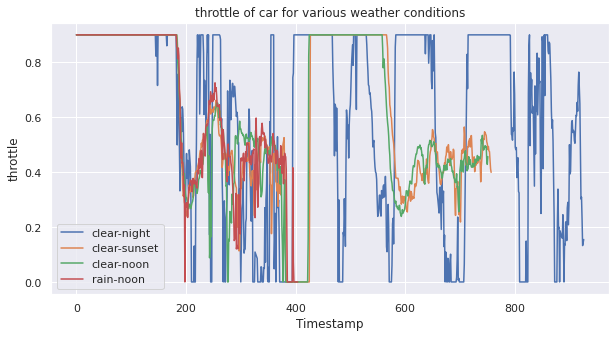

In [ ]:
plot_feature('throttle', ctl=True)

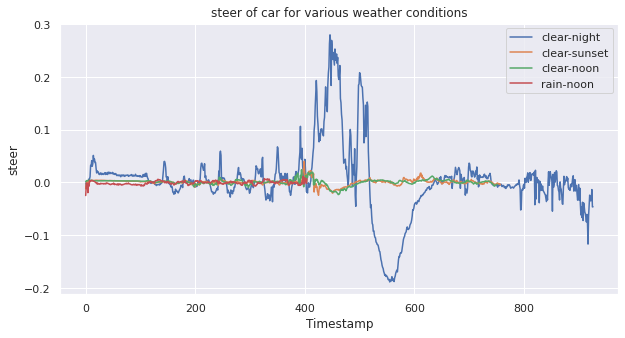

In [ ]:
plot_feature('steer', ctl=True)

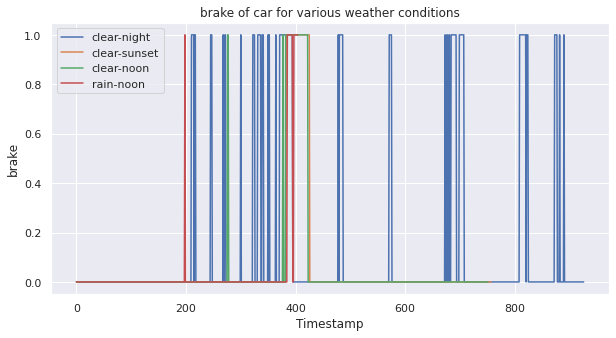

In [ ]:
plot_feature('brake', ctl=True)

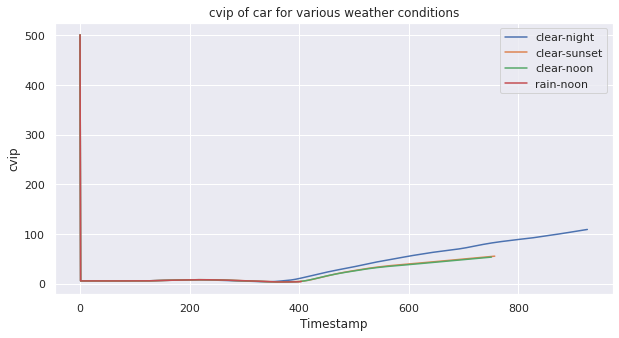

In [ ]:
plot_feature('cvip', cvip=True)

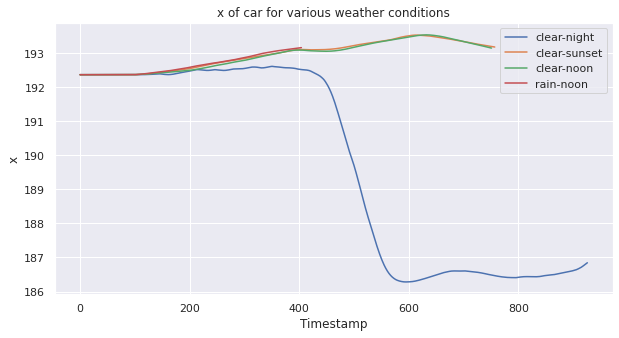

In [ ]:
plot_feature('x', traj=True)

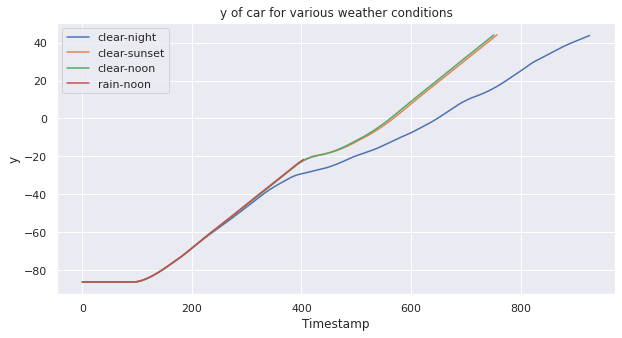

In [ ]:
plot_feature('y', traj=True)

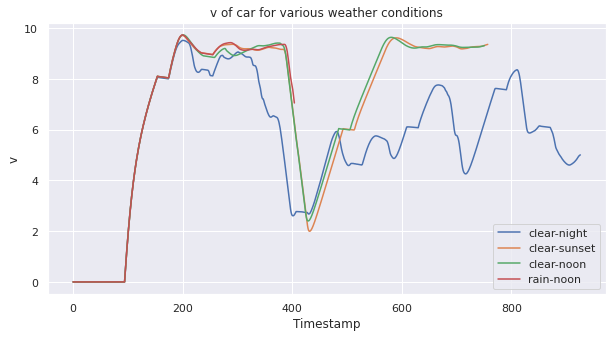

In [ ]:
plot_feature('v', traj=True)

## Task 1.4. Which features will change during an accident?

Based on my intuition, when an accident occurs there is initially a sudden push on the breaks and a sharp decrease in speed as the driver makes an attempt to not have a collision. There could also be erratic movement of the steering wheel from side to side as the car tries to avade the accident.

From the visualization of the data it seems that an accident occurs during the rain-noon weather condition as there are two sudden pressings of the break and a decrease in speed. One of the brake pressing takes much more time than those in clear sunset or clear noon. The data also stops before the other weather conditions such that the car was in an accident and stopped collecting data.

It also looks like an accident, or a near miss occurs in the clear-night weather conditon do to the erratic steering data. It seems as if the AV started swerving back and forth to avoid an accident.

# Task 2
## Task 2.1 Probability of an accident

From the 5 simulated scenarios only 1 resulted in an accident. Therefore the marginal probability of an accident ocurring is 0.2.

## Task 2.2 Weather condition for accidents

From the completion records the accident happened during the rain-noon weather condition. This was what we predicted from the simulation data. It makes sense that the accident occurs during the weather event of rain as it lowers visibility. While we would expect noon to have the most visibility time wise, since it was the only rain simulation in the data it seems the weather has a larger effect than time.

## Task 2.3 Abnormal AV behavior

Density Plot

In [ ]:
abnormal = 0
normal = 0
# Helper function for creating the density plot of a certain feature
def get_density_plot(feature, ctl=False, cvip=False, traj=False):

  if ctl:
    clear_night_y = clear_night_ctl[feature]
    clear_sunset_y = clear_sunset_ctl[feature]
    clear_noon_y = clear_noon_ctl[feature]
    rain_noon_y = rain_noon_ctl[feature]
  elif cvip:
    clear_night_y = clear_night_cvip[feature]
    clear_sunset_y = clear_sunset_cvip[feature]
    clear_noon_y = clear_noon_cvip[feature]
    rain_noon_y = rain_noon_cvip[feature]
  else:
    clear_night_y = clear_night_traj[feature]
    clear_sunset_y = clear_sunset_traj[feature]
    clear_noon_y = clear_noon_traj[feature]
    rain_noon_y = rain_noon_traj[feature]

  abnormal = clear_night_y + rain_noon_y
  normal = clear_noon_y + clear_sunset_y

  sns.set(rc = {'figure.figsize': (10,5)})
  sns.kdeplot(abnormal, label='abnormal', fill=True)
  sns.kdeplot(normal, label='normal', fill=True)

  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.title(feature)
  plt.legend()

  
  plt.show()

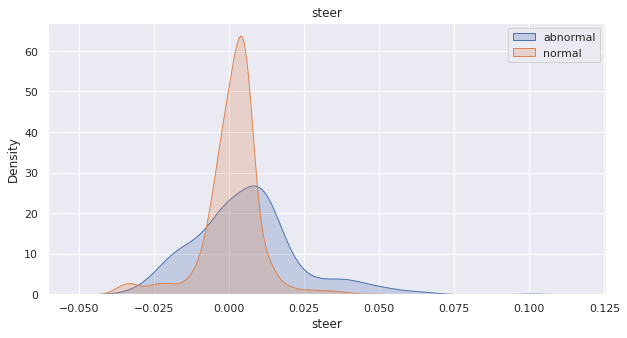

In [ ]:
get_density_plot('steer', ctl=True)

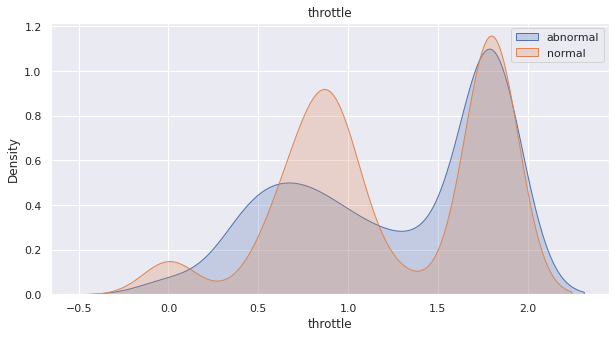

In [ ]:
get_density_plot('throttle', ctl=True)

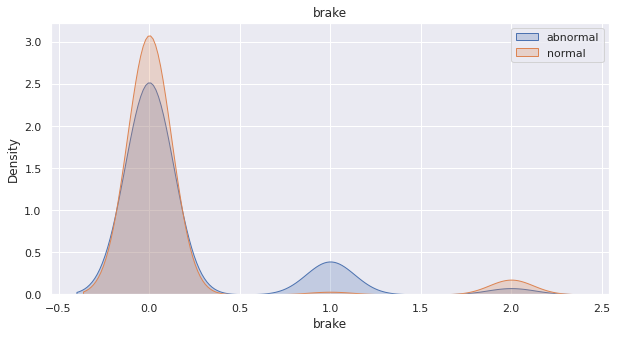

In [ ]:
get_density_plot('brake', ctl=True)

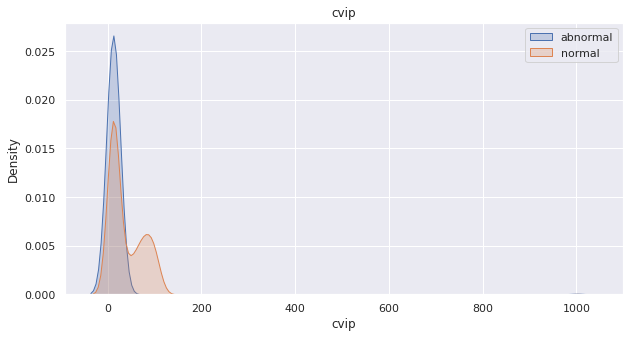

In [ ]:
get_density_plot('cvip', cvip=True)

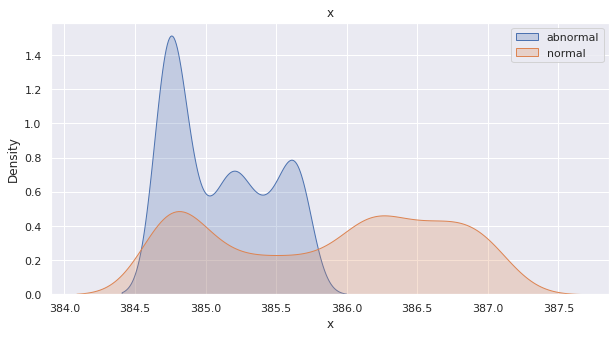

In [ ]:
get_density_plot('x', traj=True)

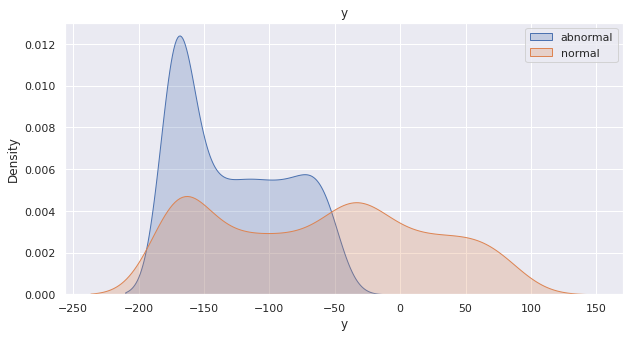

In [ ]:
get_density_plot('y', traj=True)

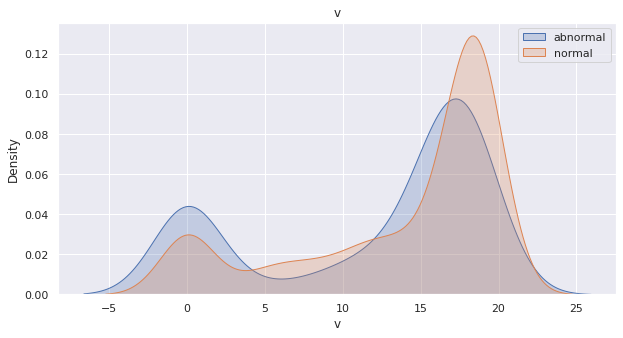

In [ ]:
get_density_plot('v', traj=True)


$H_0: \mu_a = \mu_n$ \\

$H_a: \mu \neq \mu_n$ \\


where $\sigma_a$ is the standard deviation of steer values in abnormal runs
and $\sigma_n$ is the standard deviation of steer values in normal runs


In [ ]:
abnormal = pd.concat([clear_night_ctl.steer, rain_noon_ctl.steer], axis=0)
normal = pd.concat([clear_noon_ctl.steer, clear_sunset_ctl.steer], axis=0)
scipy.stats.ttest_ind(normal, abnormal, equal_var=False)

Ttest_indResult(statistic=-1.1201087079414076, pvalue=0.26286597683500523)

The t-test gives a p-value of 0.263 which is greater than the significance level of 0.05. Thus we fail to reject the null hypothesis and conclude that the population means for steering under normal and abnormal conditions are equal.

The results can be shocking because the two distributions should be different. However, this results does not contradict our observation because while the variances of steering data under normal and abnormal weather conditions differ, for the normal case, the steering data is trends at 0 with little variance. On the other hand, for abnormal conditions, the steering data varies greatly, but is symmetric about 0. Thus we expect the means for both conditions to be roughly equal.

## Task 2.4 Features that are indicators for abnormal AV behavior

The following are better features for indicating abnormal AV behaviors:

* Steering data for abnormal conditions has much higher variance than that for normal conditions. This larger spread can be indicative of sporatic driving with volatile steering which can lead to accidents. \\
* cvip data for abnormal conditions has higher probability when the two cars are close, unlike for normal conditiosn. The closer two cars are together, the higher the chance of an accident.
* Both x and y have different spreads between when they are under abnormal and normal conditions. Intuitively this does not make sense because the car should not be varying its position drastically on the same road under different weather conditions.

In [ ]:
indicators_df = pd.DataFrame()
indicators_df['steer'] = pd.concat([clear_night_ctl.steer, rain_noon_ctl.steer, clear_noon_ctl.steer, clear_sunset_ctl.steer], axis=0)
indicators_df['cvip'] = pd.concat([clear_night_cvip.cvip, rain_noon_cvip.cvip, clear_noon_cvip.cvip, clear_sunset_cvip.cvip], axis=0)
indicators_df['x'] = pd.concat([clear_night_traj.x, rain_noon_traj.x, clear_noon_traj.x, clear_sunset_traj.x], axis=0)
indicators_df['y'] = pd.concat([clear_night_traj.y, rain_noon_traj.y, clear_noon_traj.y, clear_sunset_traj.y], axis=0)

indicators_df.corr() 

,steer,cvip,x,y
steer,1.000000,-0.125259,0.242422,-0.072079
cvip,-0.125259,1.000000,-0.604496,0.646726
x,0.242422,-0.604496,1.000000,-0.347289
y,-0.072079,0.646726,-0.347289,1.000000


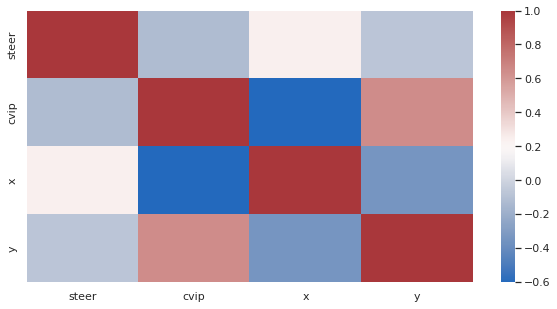

In [ ]:
sns.heatmap(indicators_df.corr(), cmap='vlag')

Since there is relatively strong correlation between x and cvip or y and cvip, we can simply use less fields to predict abnormal AV behaviour while keeping most of the predicting power while using all the features.


If we do not consider correlations between certain features (and remove some highly correlated ones), then these features may contribute much more during prediction than it should have.

## Task 2.5 Kolmogorov-Smirnov two-sample test 

$H_0$: the distribution of indicator values between in abnormal condition and that in normal condition are identical, so $F(x)=G(x)$ for all $x$ \\
$H_a$: the distribution of indicator values between in abnormal condition and that in normal condition are not identical $F(x)\neq G(x)$ (two-sided)


In [ ]:
def ks_2samp(feature, ctl=False, cvip=False, traj=False):
  if ctl:
    abnormal = pd.concat([clear_night_ctl[feature], rain_noon_ctl[feature]], axis=0)
    normal = pd.concat([clear_noon_ctl[feature], clear_sunset_ctl[feature]], axis=0)
  elif cvip:
    abnormal = pd.concat([clear_night_cvip[feature], rain_noon_cvip[feature]], axis=0)
    normal = pd.concat([clear_noon_cvip[feature], clear_sunset_cvip[feature]], axis=0)
  elif traj:
    abnormal = pd.concat([clear_night_traj[feature], rain_noon_traj[feature]], axis=0)
    normal = pd.concat([clear_noon_traj[feature], clear_sunset_traj[feature]], axis=0)
  return scipy.stats.ks_2samp(normal, abnormal)
ks_2samp('steer', ctl=True)

KstestResult(statistic=0.255447169023328, pvalue=3.216072714961863e-41)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the steering data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('cvip', cvip=True)

KstestResult(statistic=0.24501024203010957, pvalue=6.542134262242544e-38)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the cvip data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('x', traj=True)

KstestResult(statistic=0.5475548396078197, pvalue=1.0606363957036516e-199)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the x data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('y', traj=True)

KstestResult(statistic=0.1277708171747907, pvalue=1.5569290301442607e-10)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the y data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('throttle', ctl=True)

KstestResult(statistic=0.13137541515024959, pvalue=4.108169360250713e-11)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the throttle data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('brake', ctl=True)

KstestResult(statistic=0.041483205059364, pvalue=0.16863859937978443)

Since our p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis and conclude that the probability distributions between the brake data for normal and abnormal conditions are equal.

In [ ]:
ks_2samp('v', traj=True)

KstestResult(statistic=0.31729610405107095, pvalue=7.068817815005532e-64)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the v data for normal and abnormal conditions are different.

The major difference between KS test and t-test is that t-test tests on whether the means of two distributions are equal or not, while KS-test catches difference of distance between two distributions, in both shape and mean. Two sample t-test may assume the distribution is approximately normal and variability of two distributions is similar. KS-tests does not assume similarity between two distributions. 
 

To conclude, KS test can find more types of discrepancy between two distributions than the t-test can.

## Task 2.6 Assumptions of KS two-sample test

In 2.4, we assume that all the features data are independent from when they were measured (i.e. values at each time point as an individual sample independent from each other). $v$, for example, could have its value at the current timestamp be dependent on its values previous timestamp(s). This is because the change of $v$ is determined by both current $v$ and acceleration. This assumption is shown to fail for both v and throttle, since they were intially not predicted to be indicator variables. Thus, suggesting that both v and throttle are dependent on time.

## Task 2.7 Dynamic-time-wrapper (DTW)

In [ ]:
!pip install git+https://github.com/wannesm/dtaidistance.git#egg=dtaidistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/wannesm/dtaidistance.git to /tmp/pip-install-yp9n0ugg/dtaidistance_9c894489ca724109b3c8eeb533ebecab
  Running command git clone -q https://github.com/wannesm/dtaidistance.git /tmp/pip-install-yp9n0ugg/dtaidistance_9c894489ca724109b3c8eeb533ebecab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
from dtaidistance import dtw

dtw1 = dtw.distance(clear_night_ctl['steer'], clear_noon_ctl['steer'])
dtw2 = dtw.distance(clear_sunset_ctl['steer'], clear_noon_ctl['steer'])
print('dtw of steering data between clear-noon and clear-night: ' + str(dtw1))
print('dtw of steering data between clear-sunset and clear-noon: ' + str(dtw2))

dtw of steering data between clear-noon and clear-night: 1.719544523494614
dtw of steering data between clear-sunset and clear-noon: 0.061802231504329126


Temporally, the steering data between clear-night and clear-noon are less similar than the steering data between clear-sunset and clear-noon.

# Task 3
## Task 3.1a
The assumption of at most one disengagement per mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a Bernoulli distribution.

## Tasks 3.1b/c

In [ ]:
disengagements = pd.read_csv('mp1_av_disengagements.csv')
total_miles = 505229

$P(D)$ is

In [ ]:
p = len(disengagements) / total_miles # Probability of disengagement per mile

0.002026803687040926

Let D be disengagement per mile \\
$P(D | \text{cloud}) = \frac{P(\text{cloud} | D)*P(D)}{P(cloud)}$

In [ ]:
# Bayes rule for conditional probability
P_clear = 0.72
P_cloudy = 1-P_clear
print(p, len(disengagements))
p_cloudy_disengagement = 1.0 * disengagements['Weather'].value_counts()['cloudy'] / len(disengagements) * p / P_cloudy
p_clear_disengagement = 1.0 * disengagements['Weather'].value_counts()['clear'] / len(disengagements) * p / P_clear

print('Probability of a disengagement on a given mile on a cloudy day: %f' % p_cloudy_disengagement)
print('Probability of a disengagement on a given mile on a clear day: %f' % p_clear_disengagement)


0.002026803687040926 1024
Probability of a disengagement on a given mile on a cloudy day: 0.005903
Probability of a disengagement on a given mile on a clear day: 0.000520


## Task 3.1d

In [ ]:
automatic_disengagements = disengagements[disengagements.TypeOfTrigger == 'automatic']

In [ ]:
n_automatic = disengagements['TypeOfTrigger'].value_counts()['automatic']
p_automatic = n_automatic / 505229 # Probability of automatic disengagement per mile

p_cloudy_automatic = automatic_disengagements['Weather'].value_counts()['cloudy'] / n_automatic * p_automatic / P_cloudy
p_clear_automatic = automatic_disengagements['Weather'].value_counts()['clear'] / n_automatic * p_automatic / P_clear
print('Probability of an automatic disengagement on a given mile on a cloudy day: %f' % p_cloudy_automatic)
print('Probability of an automatic disengagement on a given mile on a clear day: %f' % p_clear_automatic)

Probability of an automatic disengagement on a given mile on a cloudy day: 0.002806
Probability of an automatic disengagement on a given mile on a clear day: 0.000264


## Task 3.1e



In [ ]:
import scipy.integrate as integrate

mean = p_cloudy_disengagement
std = np.sqrt(p_cloudy_disengagement * (1- p_cloudy_disengagement) )

n = 10000
Sn = 100
alpha = (Sn - n * mean) / (std * np.sqrt(n))

result =  integrate.quad(lambda x: np.exp((-x**2)/2), alpha, np.Inf)
result = (1/np.sqrt(2*np.pi)) * result[0]
print( 'Likelihood that there are 100 or more disengagements in 10,000 miles: %E' % result)
print('It is very unlikely there will be 100 or more disengagements.')

Likelihood that there are 100 or more disengagements in 10,000 miles: 4.420338E-08
It is very unlikely there will be 100 or more disengagements.


Disengagement is a binomial distribution with n = 10000, p = 0.0059. \\
So $\mu = 10000*0.0059 = 59$ \\
$\sigma = \sqrt{10000*0.0059*(1-0.0059)} = 7.658$ \\
Since 12000 is a large number, we can use the Central Limit Theorem:

In [ ]:
from scipy.stats import norm
z = (100 - 59) / 7.658
p_100_more = 1-norm.cdf(z)

print( 'Likelihood that there are 100 or more disengagements in 10,000 miles: %E' % p_100_more)
print('It is very unlikely there will be 100 or more disengagements.')

Likelihood that there are 100 or more disengagements in 10,000 miles: 4.304439E-08
It is very unlikely there will be 100 or more disengagements.


## Task 3.2a
There is a geometric distribution of miles to the next disengagment. The probability models the first occurrence of disengagement requires x miles.

There parameters of the distribution would be k, the number of miles till the next disengagement, and p, the probability of disengagement per mile 


In [94]:
p_g =  p_cloudy_disengagement
p_g

0.00590255677552725

$p(k) = (1-p)^{k-1}p$

## Task 3.2b: 
The binomial distribution describes the probabilities for repeated Bernoulli trials (3.1a) has parameter n = 10000, p = 0.002026 

## Task 3.2c: 
When X ∼ Binom(n, p) with large n, small p, such that
np ≃ λ. Then X is approximately Poisson distributed. It has parameter λ 

In [ ]:
n = 10000
lamda = p_cloudy_disengagement * n
lamda

59.0255677552725

## Task 3.2d

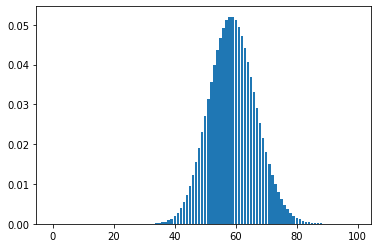

In [ ]:
from scipy.stats import binom
r_values = list(range(100))
dist = [binom.pmf(r, n, p_cloudy_disengagement) for r in r_values ]
plt.bar(r_values, dist)
plt.show()

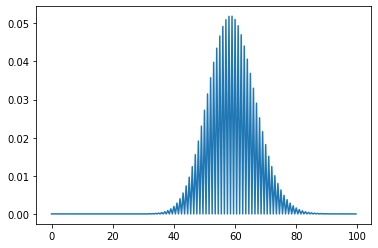

In [ ]:
from scipy.stats import poisson

x = np.arange(0, 100, 0.5)
y = poisson.pmf(x, mu=lamda, loc=0)
plt.plot(x, y)

plt.show()

Both plots look like normal distribution

## Task 3.2e
Under poisson distribution 

In [ ]:
p_100_more_2 = 1-poisson.cdf(100, lamda)
print( 'Likelihood that there are 100 or more disengagements in 10,000 miles: %E' % p_100_more_2)


Likelihood that there are 100 or more disengagements in 10,000 miles: 4.308829E-07


The result is very close to that of 3.2.c, but not equal. This is because poisson distribution is an approximation, and n is large enough (as well as p is small enough) to reach similar probability of 10000 Bernoulli trials.

## Tasks 3.3a/b

In [ ]:
cloudy_automatic = automatic_disengagements[automatic_disengagements['Weather'] == 'cloudy']

reaction_time_a = cloudy_automatic[cloudy_automatic['ReactionTime'] > 0.4]
p_reaction_a = (len(reaction_time_a) /  len(cloudy_automatic))
print('Conditional probability that reaction time is > 0.4s given weather is cloudy: %f' % p_reaction_a)

Conditional probability that reaction time is > 0.4s given weather is cloudy: 0.612091


In [ ]:
clear_automatic = automatic_disengagements[automatic_disengagements['Weather'] == 'clear']
reaction_time_b = clear_automatic[clear_automatic['ReactionTime'] > 0.7]
p_reaction_b = (len(reaction_time_b) /  len(clear_automatic))
print('Conditional probability that reaction time is > 0.7s given weather is clear: %f' % p_reaction_b)

Conditional probability that reaction time is > 0.7s given weather is clear: 0.385417


## Task 3.4



In [ ]:
clear_slow = clear_automatic[clear_automatic['ReactionTime'] > 0.7]

p_automatic_slow = ( len(reaction_time_a) + len(clear_slow) ) / total_miles

print('Probability of an accident per mile due to automatic AV disengagement and slow reaction: %f' % (p_automatic_slow))

Probability of an accident per mile due to automatic AV disengagement and slow reaction: 0.000554


$P(\text{automatic disengagement } \cap \text{slow}) = P(\text{slow }| \text{ automatic disengagement}) \cdot P(\text{automatic disengagement})$

In [ ]:
p_automatic_disengagements = len(automatic_disengagements) * 1.0 / total_miles
p_automatic_slow = (p_reaction_a + p_reaction_b) * p_automatic_disengagements
p_automatic_slow
print('Probability of an accident per mile due to automatic AV disengagement and slow reaction: %f' % (p_automatic_slow))

Probability of an accident per mile due to automatic AV disengagement and slow reaction: 0.000973


## Task 3.5a

In [ ]:
posterior = len(reaction_time_a[reaction_time_a.Cause == "Software Froze"]) / len(reaction_time_a)
print("P(SF|auto disengagement, rt>0.4s, cloudy): %f" % posterior)

P(SF|auto, rt>0.4s, cloudy): 0.053498


## Task 3.5b

In [ ]:
posterior = len(reaction_time_b[reaction_time_b.Cause == "Software Froze"]) / len(reaction_time_b)
print("P(SF|auto disengagement, rt>0.7s, clear): %f" % posterior)

P(SF|auto disengagement, rt>0.7s, clear): 0.243243


## Task 3.6a

<img src='https://github.com/seanseungbeomlee/ECE-471-MP1-AV-Analysis/blob/8d65a88241d91a3d6e3d1162dff15cb50499cef6/naive_bayes_diagram.png?raw=true' width = 300px>

## Task 3.6b

*   Prior (2 parameters): P(Software Froze), P(Hardware Fault), P(Other)
*   Conditional Probability (6): P(Location|C) and P(Weather|C) for all three causes (C)

A total of 9 parameters for prior and conditional probability. 


## Task 3.6c
Prior:

In [ ]:
cause = disengagements['Cause'].unique()
cause
# Preprocess 'Other' cause
disengagements.loc[(disengagements['Cause']!= 'Software Froze') & (disengagements['Cause'] != 'Hardware Fault'),'Cause'] = 'Other'
cause = disengagements['Cause'].unique()
cause

array(['Other', 'Software Froze', 'Hardware Fault'], dtype=object)

In [ ]:
prior = pd.DataFrame()
for c in cause:
  prior.loc[c, 'P'] = (disengagements['Cause']==c).sum() * 1.0 / len(disengagements)
prior

,P
Other,0.802734
Software Froze,0.095703
Hardware Fault,0.101562


In [ ]:
location = disengagements['Location'].unique()
weather = disengagements['Weather'].unique()
location_cpt = pd.DataFrame()

for c in cause:
  for l in location:
    location_cpt.loc[c, l] = ((disengagements['Location']==l) & (disengagements['Cause'] == c)).sum() / (disengagements['Cause']==c).sum()
location_cpt

,urban-street,highway
Other,0.993917,0.006083
Software Froze,0.938776,0.061224
Hardware Fault,0.913462,0.086538


In [ ]:
location_cpt = pd.DataFrame()

for c in cause:
  for w in weather:
    location_cpt.loc[c, w] = ((disengagements['Weather']==w) & (disengagements['Cause'] == c)).sum() / (disengagements['Cause']==c).sum()
location_cpt

,cloudy,clear
Other,0.913625,0.086375
Software Froze,0.387755,0.612245
Hardware Fault,0.442308,0.557692




*   $P(\text{other} | \text{cloudy}, \text{urban-street}) = 0.802734 \times 0.913625 \times 0.993917 = 0.728$ 
*   $P(\text{software froze} | \text{cloudy}, \text{urban-street}) = 0.095703 \times 0.387755 \times 0.938776 = 0.035$ 
*   $P(\text{hardware fault} | \text{cloudy}, \text{urban-street}) = 0.101562 \times 0.442308 \times 0.913462 = 0.041$ 


## Task 3.6d
The most possible root cause given the day was cloudy and the Location was urban-street is **other**.

# Task 4

## Task 4.1a

In [ ]:
simulation = pd.read_csv('part3_data.csv')
simulation.drop(simulation.index[simulation['status'] == 'Failed -- Simulator crashed'], inplace = True)
accident_p = len(simulation[simulation['status'] == 'Failed -- Accident']) * 1.0 / len(simulation)
print("The probability of accident P(acc=1) across all weather conditions is", accident_p)

weather = simulation['weather'].unique()
print(weather)

The probability of accident P(acc=1) across all weather conditions is 0.0898989898989899
['clear-noon' 'cloudy-noon' 'rain-noon' 'snow-noon']


## Task 4.1b

P (Accident = 1 | Weather condition = ?)

In [ ]:
acc = simulation[simulation['status'] == 'Failed -- Accident']
p_a_given_w = {}

for weather_condition in ['clear', 'cloudy', 'rain', 'snow']:

  weather_simulations = simulation[simulation['weather'].str.startswith(weather_condition, na=False)]
  weather_accidents = weather_simulations[weather_simulations['status'] == 'Failed -- Accident']

  p_a_given_w[weather_condition] = len(weather_accidents) / len(weather_simulations)
  print(weather_condition, len(weather_accidents) / len(weather_simulations))



clear 0.008130081300813009
cloudy 0.04251012145748988
rain 0.12474849094567404
snow 0.18309859154929578


## Task 4.2 Probability of Accident

Assumption: \\
1. The AV is equally likely to drive on any weather condition
2. Weather condition is mututally exclusive on a day (a day cannot be both clear and cloudy, for example)

Let A be accident, and C be weather where C = {Clear, Cloudy, Rain, Snow} \\
$P(A) = \sum_C P(A \land C)$ By law of total probability \\
$P(A) = \sum_C {P (A|C)} {P(C)}$ By conditional probability 

In [ ]:
california_weather = {'clear': 0.72, 'cloudy': 0.15, 'rain': 0.1, 'snow': 0.03}
chicago_weather = {'clear': 0.56, 'cloudy': 0.1, 'rain': 0.25, 'snow': 0.09}

def probability_projection(p_w, p_a_given_w):
  total_probability = 0

  for weather_condition in p_a_given_w:
    total_probability += p_a_given_w[weather_condition] * p_w[weather_condition]

  return total_probability

print('Probability of accident in cut-in scenario for California: %f' 
      % (probability_projection(california_weather, p_a_given_w)))
print('Probability of accident in cut-in scenario for Chicago: %f' 
      % (probability_projection(chicago_weather, p_a_given_w)))


Probability of accident in cut-in scenario for California: 0.030198
Probability of accident in cut-in scenario for Chicago: 0.056470


## Task 4.3a
In oder to make a reasonable comparison between the probabiities of an accident of the simulated dataset and the real dataset, we take only the accidents from the simulation dataset that occured during clear and cloudy weather conditions.

In [89]:
apm_dmv = 0.000973 # from task 3.4
apm_simulation = len(acc[acc.weather.str.contains('clear') | acc.weather.str.contains('cloudy')]) / len(simulation[simulation.weather.str.contains('clear') | simulation.weather.str.contains('cloudy')])

apm_dmv, apm_simulation

(0.000973, 0.02535496957403651)

## Task 4.3b
Considering for every one mile, there are k cut-in scenarios (independent trials), the probability of having accident is p (the probability of success in each trial). Then using Binomial distribution with n = k, p, and k = 0, the probability of having no accident at all is 

$P(0) = {k \choose 0}(1-p)^k = (1-p)^k$ 

Then

$P(\geq 1) = 1-P(0) = 1- (1-p)^k$

## Task 4.3c
The simulated dataset has a higher probabilty of an accident per mile. In this isolated environment that is designed to produce accidents bewteen an AV and eagle vehicle, it is naturally going to have a higher rate of accidents than in real life.

## Task 4.3d

Simulation allows more weather condition and more flexible scenarios than what real-world data can generate. This allows us to have a wider perception and take account of possible undesirable road condition and accident in the future.

# Task 4.4
More involvement in setting up the simulation runs would be beneficial. In this case, we just had to run the bash and python script. Also, more consistency in the feature names would be nice. For example for task 4.3a, we were unsure whether we could equate "sunny" and "clear" weather conditions. We assumed they were the same, but clarity here would've saved us time.